In [230]:
# House Prices - Advanced Regression Techniques
# Exploratory Data Analysis (EDA) y Modelado

"""
Este notebook realiza un análisis exploratorio de datos (EDA) sobre el dataset de precios de casas 
de Kaggle 'House Prices - Advanced Regression Techniques'. Se estudian las características de las 
variables, la calidad de los datos y su relación con el precio de venta de las propiedades (SalePrice).

Además, se entrena un modelo de Random Forest Regressor para intentar predecir el precio de venta final 
de las casas con base en las características disponibles en el dataset.

Autor: Rodrigo Alan García Pérez
Fecha: 3 de febrero de 2025
"""

"\nEste notebook realiza un análisis exploratorio de datos (EDA) sobre el dataset de precios de casas \nde Kaggle 'House Prices - Advanced Regression Techniques'. Se estudian las características de las \nvariables, la calidad de los datos y su relación con el precio de venta de las propiedades (SalePrice).\n\nAdemás, se entrena un modelo de Random Forest Regressor para intentar predecir el precio de venta final \nde las casas con base en las características disponibles en el dataset.\n\nAutor: Rodrigo Alan García Pérez\nFecha: 3 de febrero de 2025\n"

In [231]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.max_rows', None)

Comenzamos con el EDA del dataset

In [232]:
# Lectura del dataset 
df_train = pd.read_csv('/Users/rodrigog/Documents/MetodosDeGranEscala/data/train.csv')

In [233]:
# Primer vistazo
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [234]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


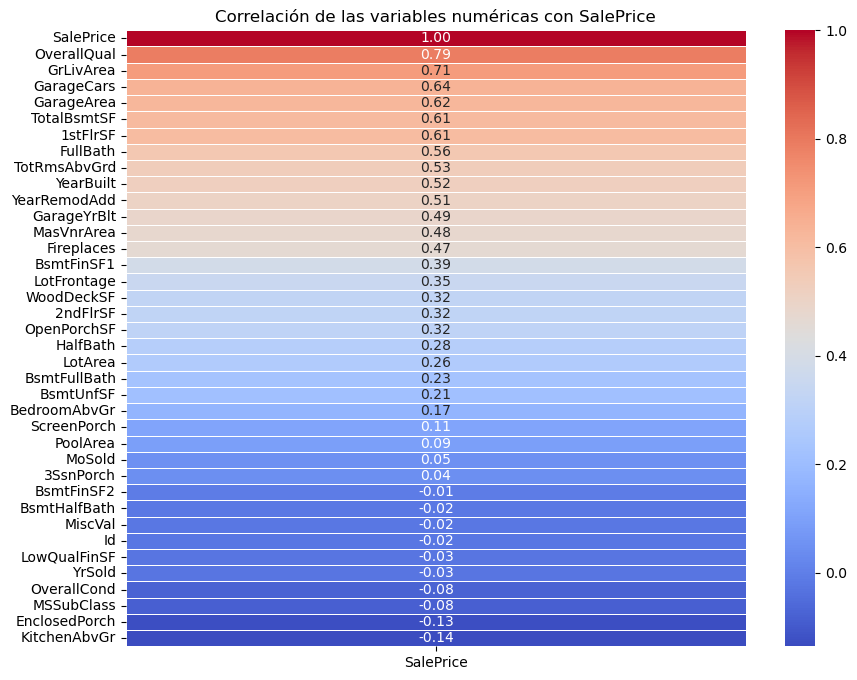

In [235]:
# Calcular la correlación de todas las variables numéricas con SalePrice
corr_matrix = df_train.corr(numeric_only=True)
correlation_target = corr_matrix["SalePrice"].sort_values(ascending=False)

# Plot de heatmap con las correlaciones más altas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_target.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlación de las variables numéricas con SalePrice")
plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

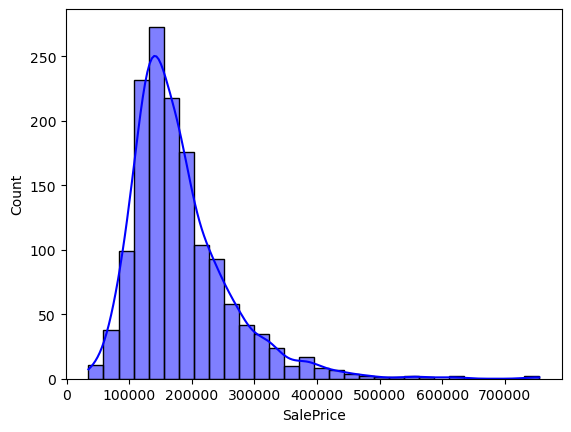

In [236]:
# Revisamos la distribucion de la variable objetivo
sns.histplot(df_train['SalePrice'], kde=True, bins=30, color='blue')

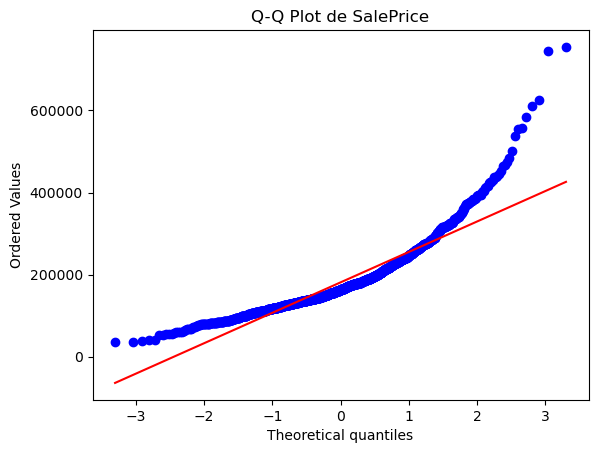

In [237]:
# Crear el QQ Plot
stats.probplot(df_train['SalePrice'], dist="norm", plot=plt)
plt.title("Q-Q Plot de SalePrice")
plt.show()

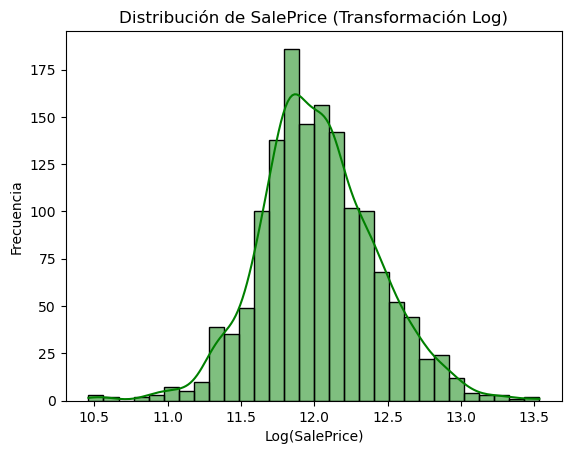

In [238]:
#Corregiremos la asimetria de la variable objetivo con una transformacion logaritmica 
df_train['SalePrice_Log'] = np.log1p(df_train['SalePrice'])
sns.histplot(df_train['SalePrice_Log'], kde=True, bins=30, color='green')
plt.title("Distribución de SalePrice (Transformación Log)")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frecuencia")
plt.show()

In [239]:
df_train.shape

(1460, 82)

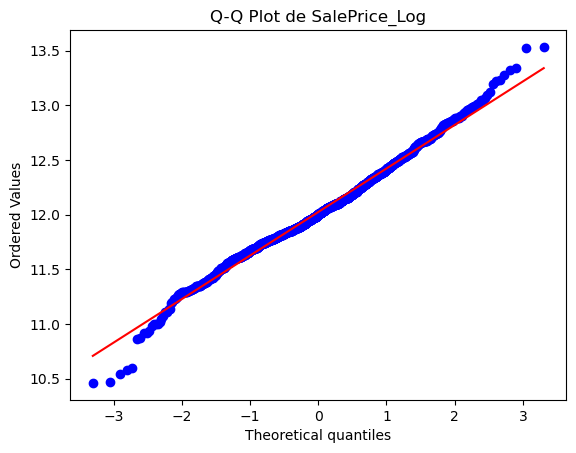

In [240]:
# Crear el QQ Plot
stats.probplot(df_train['SalePrice_Log'], dist="norm", plot=plt)
plt.title("Q-Q Plot de SalePrice_Log")
plt.show()

In [241]:
# Revisamos valores nulos 
df_train.isnull().sum()[df_train.isnull().sum() > 0]


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [242]:
# De las columnas con valores nulos revisemos que tipo son 
# Filtrar solo las columnas que tienen valores nulos
columnas_con_nulos = df_train.isnull().sum()[df_train.isnull().sum() > 0].index

# Mostrar los tipos de datos de esas columnas
df_train[columnas_con_nulos].dtypes


LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

Nos damos cuenta que las columnas con nulos son en su mayoria no numericas y esto es por la forma de algunas variables del dataset ya que son variables ordinales donde algunos valores se definen como NA pero no significa que sea nulos como tal.

In [243]:
# Filtrar solo columnas categóricas
categorical_columns = df_train.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

Columnas categóricas: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [244]:
# Mostrar valores únicos de cada columna categórica
for col in categorical_columns:
    print(f"Valores únicos en '{col}':\n{df_train[col].unique()}\n")

Valores únicos en 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH']

Valores únicos en 'Street':
['Pave' 'Grvl']

Valores únicos en 'Alley':
[nan 'Grvl' 'Pave']

Valores únicos en 'LotShape':
['Reg' 'IR1' 'IR2' 'IR3']

Valores únicos en 'LandContour':
['Lvl' 'Bnk' 'Low' 'HLS']

Valores únicos en 'Utilities':
['AllPub' 'NoSeWa']

Valores únicos en 'LotConfig':
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Valores únicos en 'LandSlope':
['Gtl' 'Mod' 'Sev']

Valores únicos en 'Neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Valores únicos en 'Condition1':
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Valores únicos en 'Condition2':
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Valores únicos en 'BldgType':
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

In [245]:
# Aplicaremos label encoding a las variables ordinales y asi evitaremos tener valores nulos 

# Diccionario con las categorías en orden, incluyendo "None" para representar NA
ordinal_mappings = {
    "ExterQual": ['Fa', 'TA', 'Gd', 'Ex'],
    "ExterCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtQual": ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtCond": ['None', 'Po', 'Fa', 'TA', 'Gd'],
    "BsmtExposure": ['None', 'No', 'Mn', 'Av', 'Gd'],
    "BsmtFinType1": ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtFinType2": ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "HeatingQC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['Fa', 'TA', 'Gd', 'Ex'],
    "FireplaceQu": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageQual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageCond": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageFinish": ['None', 'Unf', 'RFn', 'Fin'],
    "PoolQC": ['None', 'Fa', 'Gd', 'Ex'],
    "Fence": ['None', 'MnWw', 'MnPrv', 'GdWo', 'GdPrv'],
    "LotShape": ['IR3', 'IR2', 'IR1', 'Reg'],
    "LandSlope": ['Gtl', 'Mod', 'Sev'],
    "Utilities": ['NoSeWa', 'AllPub'],
    "PavedDrive": ['N', 'P', 'Y']
}


# Reemplazar valores NaN con "None" antes de codificar
for col in ordinal_mappings.keys():
    df_train[col] = df_train[col].fillna('None')  # Ahora "None" representa NA explícitamente

# Aplicar Ordinal Encoding
encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_mappings])
df_train[list(ordinal_mappings.keys())] = encoder.fit_transform(df_train[list(ordinal_mappings.keys())])

# Mostrar ejemplo de las columnas transformadas
print(df_train[list(ordinal_mappings.keys())].head())

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        2.0        2.0       3.0       3.0           1.0           6.0   
1        1.0        2.0       3.0       3.0           4.0           5.0   
2        2.0        2.0       3.0       3.0           2.0           6.0   
3        1.0        2.0       2.0       4.0           1.0           5.0   
4        2.0        2.0       3.0       3.0           3.0           6.0   

   BsmtFinType2  HeatingQC  KitchenQual  FireplaceQu  GarageQual  GarageCond  \
0           1.0        4.0          2.0          0.0         3.0         3.0   
1           1.0        4.0          1.0          3.0         3.0         3.0   
2           1.0        4.0          2.0          3.0         3.0         3.0   
3           1.0        3.0          2.0          4.0         3.0         3.0   
4           1.0        4.0          2.0          3.0         3.0         3.0   

   GarageFinish  PoolQC  Fence  LotShape  LandSlope  Utilities  Pave

In [246]:
df_train.shape

(1460, 82)

In [247]:
# Ahora modificamos las columnas nominales 
# Lista de columnas nominales para aplicar One-Hot Encoding
nominal_columns = [
    'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
    'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# 🔹 Reemplazar NaN con "None" antes de One-Hot Encoding
for col in nominal_columns:
    df_train[col] = df_train[col].fillna('None')


# Aplicar One-Hot Encoding directamente a df_train
df_train = pd.get_dummies(df_train, columns=nominal_columns) 


In [248]:
for col in nominal_columns:
    # Filtrar todas las columnas que empiezan con el nombre original
    encoded_cols = [c for c in df_train.columns if c.startswith(col + '_')]
    print(f"'{col}' → {len(encoded_cols)} columnas generadas: {encoded_cols}")

'MSZoning' → 5 columnas generadas: ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM']
'Street' → 2 columnas generadas: ['Street_Grvl', 'Street_Pave']
'Alley' → 3 columnas generadas: ['Alley_Grvl', 'Alley_None', 'Alley_Pave']
'LandContour' → 4 columnas generadas: ['LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl']
'LotConfig' → 5 columnas generadas: ['LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside']
'Neighborhood' → 25 columnas generadas: ['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighbo

In [249]:
# Revisamos valores nulos 
df_train.isnull().sum()

Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
LotShape                   0
Utilities                  0
LandSlope                  0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
ExterQual                  0
ExterCond                  0
BsmtQual                   0
BsmtCond                   0
BsmtExposure               0
BsmtFinType1               0
BsmtFinSF1                 0
BsmtFinType2               0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
HeatingQC                  0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
KitchenQual   

In [250]:
# De las columnas con valores nulos revisemos que tipo son 
# Filtrar solo las columnas que tienen valores nulos
columnas_con_nulos = df_train.isnull().sum()[df_train.isnull().sum() > 0].index

# Mostrar los tipos de datos de esas columnas
df_train[columnas_con_nulos].dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [251]:
# Revisemos los nulos restantes 
df_train.isnull().sum()[df_train.isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [252]:
# Para LotFrontage es extrano que haya tantos nulos. Lo que me hace pensar que los nulos significa que la propiedad no tiene acceso a la calle, como un departamento. 
# Asi que cambiare los nulos por 0 
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

In [253]:
# Para MasVnrArea al ser pocos nulos y al si haber ya presentes valores de 0, eliminaremos los nulos 
df_train = df_train.dropna(subset=['MasVnrArea'])

In [254]:
# Para GarageYrBlt asumiremos que GarageYrBlt y YearBuilt son similares asi que eliminamos esta variable 
df_train = df_train.drop(columns=['GarageYrBlt'])

Ahora si con un dataset limpio y con la variable objetivo transformada logaritimicamente vamos a entrenar el modelo 

In [255]:
# Definir X (variables predictoras) y y (variable objetivo transformada)
X = df_train.drop(columns=['SalePrice_Log','SalePrice','Id'])  # Eliminamos la variable objetivo transformada
y = df_train['SalePrice_Log']  # Usamos la versión transformada

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [257]:
X.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.949036,57.634986,10507.276171,2.590909,0.999311,0.062672,6.092975,5.579201,1971.116391,1984.775482,...,46.390496,21.937328,3.428375,15.143939,2.774105,0.009642,0.497934,43.728650,6.318182,2007.815427
std,42.340097,34.646214,9989.563592,0.582894,0.026243,0.276954,1.381289,1.113136,30.193761,20.652466,...,66.048619,61.089879,29.396943,55.899665,40.287389,0.148192,1.085267,497.478278,2.699644,1.328927
min,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,42.000000,7538.750000,2.000000,1.000000,0.000000,5.000000,5.000000,1954.000000,1966.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,63.000000,9478.500000,3.000000,1.000000,0.000000,6.000000,5.000000,1972.000000,1993.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11600.000000,3.000000,1.000000,0.000000,7.000000,6.000000,2000.000000,2004.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,3.000000,1.000000,2.000000,10.000000,9.000000,2010.000000,2010.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,3.000000,4.000000,15500.000000,12.000000,2010.000000


In [258]:
y_train.values

array([12.5317764 , 12.14153946, 12.14950759, ..., 11.92338475,
       11.19135563, 12.15478461])

In [259]:
# Definir el modelo base
model = RandomForestRegressor(random_state=60)

# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [10, 20, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Mínimo de muestras en una hoja
}

# Configurar la búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Optimizar para MAE (Mean Absolute Error)
    cv=5,  # Validación cruzada con 5 folds
    n_jobs=-1,  # Usar todos los núcleos de la CPU
    verbose=2,
    return_train_score=True  # Añadido para ver scores de entrenamiento
)

# Ejecutar Grid Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_sa

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=60), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [260]:
print("📌 Mejores Hiperparámetros:", grid_search.best_params_)

📌 Mejores Hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [261]:
# Usar el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones en el conjunto de entrenamiento
y_train_pred_log = best_model.predict(X_train)
y_train_pred = np.expm1(y_train_pred_log)
y_train_real = np.expm1(y_train)  # Invertimos la transformación logarítmica

# Predicciones en el conjunto de prueba
y_test_pred_log = best_model.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log)
y_test_real = np.expm1(y_test)

# Calcular métricas en `train`
mae_train = mean_absolute_error(y_train_real, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train_real, y_train_pred))
r2_train = r2_score(y_train_real, y_train_pred)

# Calcular métricas en `test`
mae_test = mean_absolute_error(y_test_real, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test_real, y_test_pred))
r2_test = r2_score(y_test_real, y_test_pred)

# Imprimir resultados
print(f"📌 **Métricas en Train:**")
print(f"MAE Train: {mae_train:.2f}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"R² Train: {r2_train:.4f}")
print("\n📌 **Métricas en Test:**")
print(f"MAE Test: {mae_test:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"R² Test: {r2_test:.4f}")

📌 **Métricas en Train:**
MAE Train: 7045.89
RMSE Train: 12975.73
R² Train: 0.9726

📌 **Métricas en Test:**
MAE Test: 19151.80
RMSE Test: 31801.41
R² Test: 0.8518


Podemos apreciar que hay overfitting en nuestro modelo. En el futuro se puede intentar mejorar nuestra ingenieria de caracteristicas o modificar los hiperparametros del modelo para intentar mejorar el desempeño del modelo. 

In [262]:
np.expm1(df_train['SalePrice_Log']).describe()

count      1452.000000
mean     180615.063361
std       79285.541485
min       34900.000000
25%      129900.000000
50%      162700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice_Log, dtype: float64

Para terminar, definimos una funcion que se encargue de limpiar y aplicar los encoders necesarios a los datos ingresados por el cliente y prediga el precio.

In [263]:
def predict_from_csv(file_path):
    # Cargar el archivo CSV del usuario
    df_user = pd.read_csv(file_path)

    # Verificar si tiene una sola fila
    if df_user.shape[0] != 1:
        print("Error: El CSV debe contener exactamente una fila de datos.")
        return
    
    # Eliminar la columna 'Id' si está presente
    if 'Id' in df_user.columns:
        df_user = df_user.drop(columns=['Id'])

    # 1. Reemplazar valores NaN con valores adecuados
    df_user = df_user.dropna(subset=['MasVnrArea'])
    df_user = df_user.drop(columns=['GarageYrBlt'])
    df_user['LotFrontage'] = df_user['LotFrontage'].fillna(0)
    
    # 2. Rellenar NaN en variables categóricas con "None"
    for col in nominal_columns:
        if col in df_user.columns:
            df_user[col] = df_user[col].fillna('None')

    # 3. Aplicar Label Encoding a las variables ordinales usando `transform()`
    for col in ordinal_mappings.keys():
        if col in df_user.columns:
            df_user[col] = df_user[col].fillna('None')

    df_user[list(ordinal_mappings.keys())] = encoder.transform(df_user[list(ordinal_mappings.keys())])

    # 4. Aplicar One-Hot Encoding a variables nominales
    df_user = pd.get_dummies(df_user, columns=nominal_columns)

    # 5. Asegurar que `df_user` tenga las mismas columnas que `X`
    df_user = df_user.reindex(columns=X.columns, fill_value=0)

    # 6. Generar la predicción
    y_pred_log = best_model.predict(df_user)  # Predicción en escala logarítmica
    y_pred = np.expm1(y_pred_log)  # Convertir a escala original

    print(f"Precio estimado de la casa: ${y_pred[0]:,.2f}")


In [264]:
file_path = "/Users/rodrigog/Documents/MetodosDeGranEscala/test_data/userdata.csv"  # Ruta del archivo CSV del usuario
predict_from_csv(file_path)

Precio estimado de la casa: $151,055.36


In [265]:
file_path = "/Users/rodrigog/Documents/MetodosDeGranEscala/test_data/userdata2.csv"  # Ruta del archivo CSV del usuario
predict_from_csv(file_path)

Precio estimado de la casa: $133,159.82
